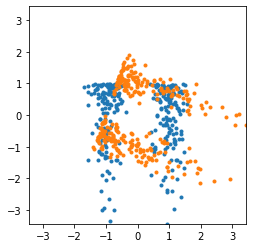

In [132]:
# Code on ICA using negentropy

import numpy as np
import matplotlib.pyplot as plt

def znorm(x):
    x -= x.mean()
    x /= x.std()
    x = x.reshape(1,-1)
    return x

N = 300
g = np.random.randn(N)
x1 = znorm(np.random.rand(N))
x2 = znorm(np.random.rand(N))
x1 = znorm(np.random.laplace(size=N))
#x2 = znorm(np.random.laplace(size=N))
x1 = znorm(np.random.beta(0.5, 2, N))
x1 = znorm(np.concatenate((np.random.randn(int(N/2))-4, np.random.randn(int(N/2))+4), axis=0))
x2 = -znorm(np.random.beta(0.5, 2, N))

x = np.concatenate((x1,x2), axis=0)

A = np.random.randn(2,2)
(Q, R) = np.linalg.qr(A)
x.shape
#plt.hist(g,40, density=True);
#plt.hist(x1,40, density=True);
z = Q@x
plt.plot(x[0,:], x[1,:], '.')
plt.plot(z[0,:], z[1,:], '.')

mn = min(z.min(), x.min())
mx = max(z.max(), x.max())
plt.xlim((mn,mx))
plt.ylim((mn,mx))

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.draw()

(300, 2)
(300, 2)
(300, 2)


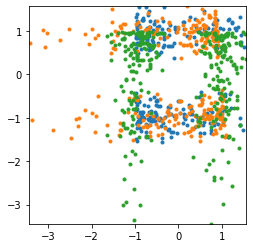

In [133]:
rng = np.random.RandomState(1907)


from sklearn.decomposition import PCA, FastICA

def do_ica(fun):
    ica = FastICA(random_state=rng, whiten='unit-variance', fun=fun)

    zT = z.T

    S_ica_ = ica.fit(zT).transform(zT)  # Estimate the sources
    w = S_ica_[:,0]

    mn = min(z.min(), x.min())
    mx = max(z.max(), x.max())
    plt.xlim((mn,mx))
    plt.ylim((mn,mx))

    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    plt.draw()

    zh = S_ica_

    plt.plot(zh[:,0], zh[:,1], '.')
    print(zh.shape)
    mn = min(zh.min(), zh.min())
    mx = max(zh.max(), zh.max())
    plt.xlim((mn,mx))
    plt.ylim((mn,mx))

do_ica('exp')
do_ica('cube')
do_ica('logcosh')